In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\Lukas\Projetos\Machine-Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
dataset_path = '../../datasets/AEP_hourly.csv'

In [4]:
df = pd.read_csv(dataset_path, delimiter=',')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [6]:
df.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [7]:
steps = 36

15:36:01 - cmdstanpy - INFO - Chain [1] start processing
15:37:22 - cmdstanpy - INFO - Chain [1] done processing


                      Date   Actual     Predicted
121237 2018-01-02 13:00:00  20698.0           NaN
121238 2018-01-02 14:00:00  20123.0           NaN
121239 2018-01-02 15:00:00  19648.0           NaN
121240 2018-01-02 16:00:00  19317.0           NaN
121241 2018-01-02 17:00:00  19658.0           NaN
...                    ...      ...           ...
121300                 NaT      NaN  16867.802812
121301                 NaT      NaN  16786.171395
121302                 NaT      NaN  16370.759756
121303                 NaT      NaN  15697.755512
121304                 NaT      NaN  14937.127246

[68 rows x 3 columns]


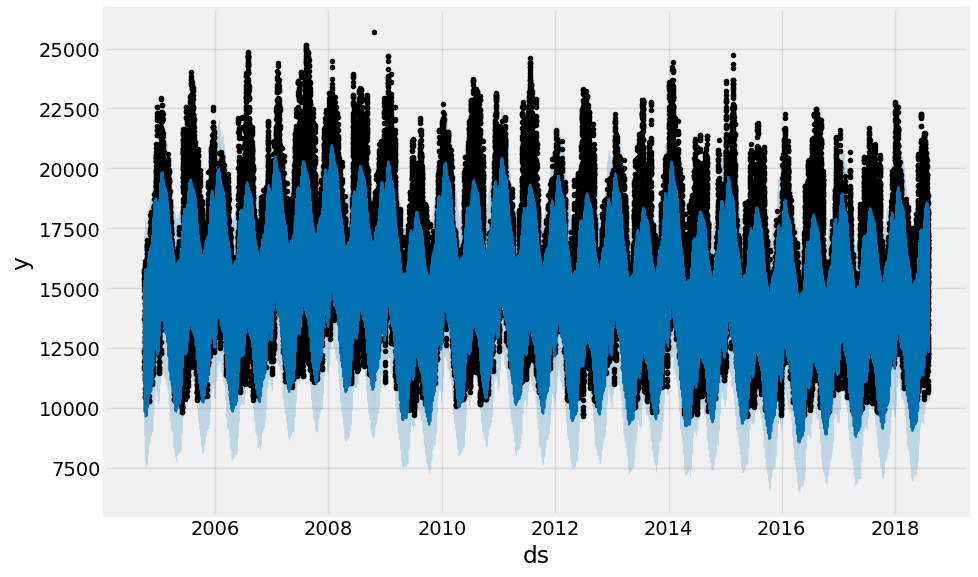

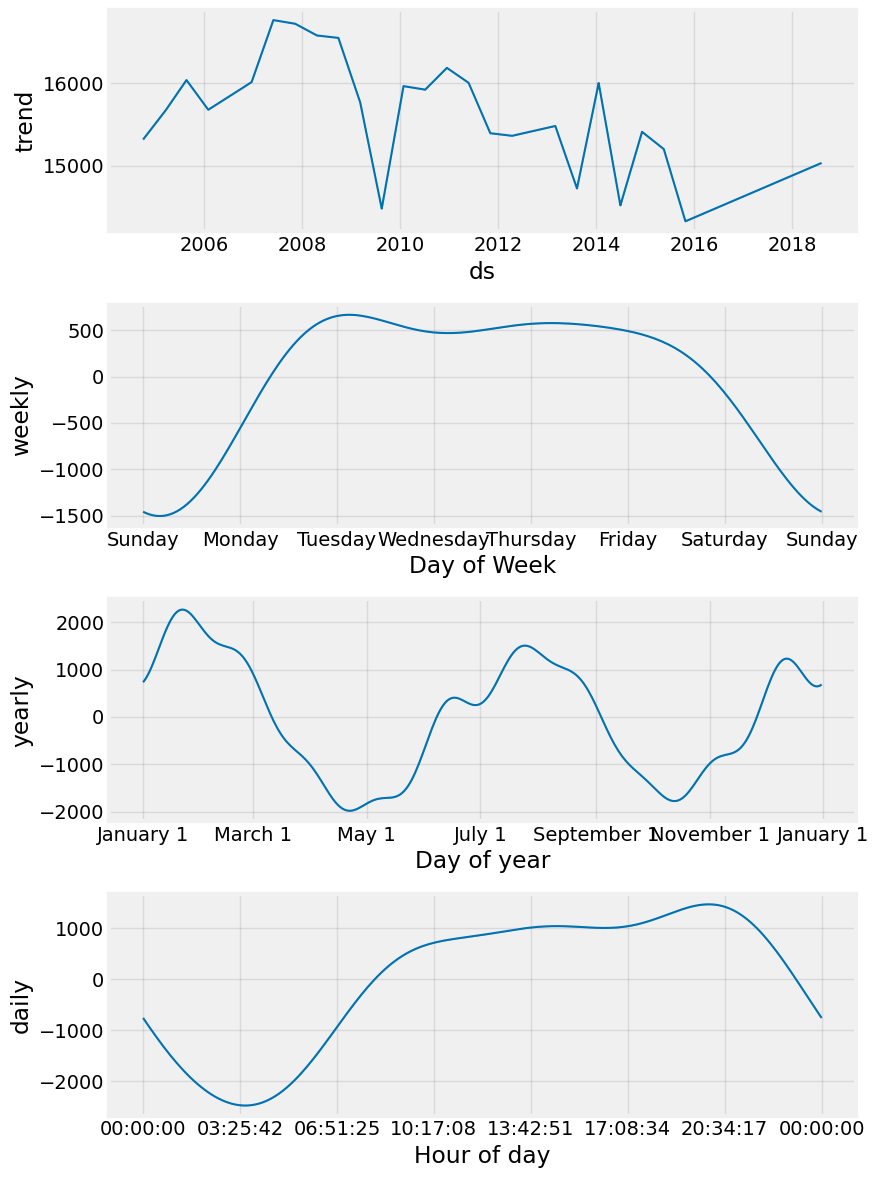

In [13]:
# Prepare the data for Prophet
df = df.rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d %H:%M:%S')

# Split the data into training and testing sets
train_data = df[:-steps]
test_data = df[-steps:]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train_data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=72, freq='h')

# Make predictions
forecast = model.predict(future)

# Compare predictions with actual values
comparison = pd.DataFrame({'Date': test_data['ds'], 'Actual': test_data['y'], 'Predicted': forecast['yhat'][-steps:]})

# Print the comparison dataframe
print(comparison)

# Plot the predictions
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [14]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

y_true = test_data['y'].values
y_pred = forecast['yhat'][-steps:].values
# Erro médio absoluto
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# Erro médio quadrado
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
# Raiz do erro médio quadrado
rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

MAE: 4629.582
MSE: 22861172.544
RMSE: 4781.336


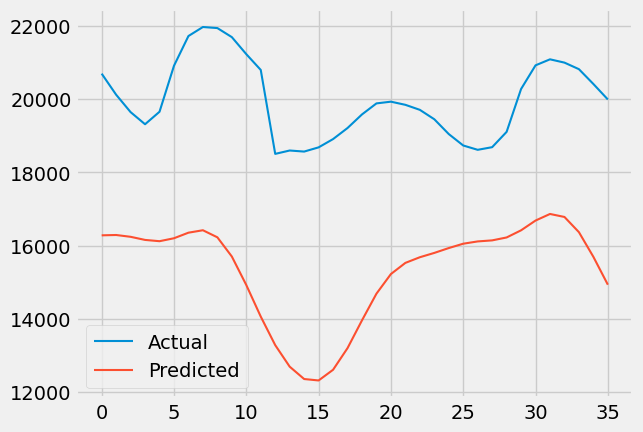

In [15]:
# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [11]:
# import joblib

In [12]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')